https://www.suno.com.br/noticias/weg-wege3-embraer-embr3-analistas-destacam-beneficiar-plano-nova-industria-va/

https://www.infomoney.com.br/politica/perspectivas-da-nova-industria-no-brasil-setor-busca-modernizacao/

C:\Users\DanaK\AppData\Local\Temp\ipykernel_17764\1818098114.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'ROE (%)': roe[0],
C:\Users\DanaK\AppData\Local\Temp\ipykernel_17764\1818098114.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'ROA (%)': roa[0],
C:\Users\DanaK\AppData\Local\Temp\ipykernel_17764\1818098114.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Debt to Equity': debt_to_equity[0],
C:\Users\DanaK\AppD

    Company    ROE (%)    ROA (%)  Debt to Equity  EBITDA Margin (%)
0  CSNA3.SA  -1.818250  -0.347653        4.105263          18.892428
1  EMBR3.SA   5.885519   1.520983        2.778826          11.073361
2  GGBR4.SA  15.290918  10.017427        0.522764          19.202798
3  TUPY3.SA  15.285840   4.940716        2.092772          10.576917
4  VAMO3.SA        NaN        NaN        3.394410          43.342006
5  MILS3.SA        NaN        NaN        0.876381          55.209486
6  WEGE3.SA        NaN        NaN        0.786612          22.671030
7  POMO3.SA  23.018516  10.254152        1.232941          17.117457


C:\Users\DanaK\AppData\Local\Temp\ipykernel_17764\1818098114.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='EBITDA Margin (%)', data=kpis_df, ax=axs[1, 1], palette="Oranges_d")


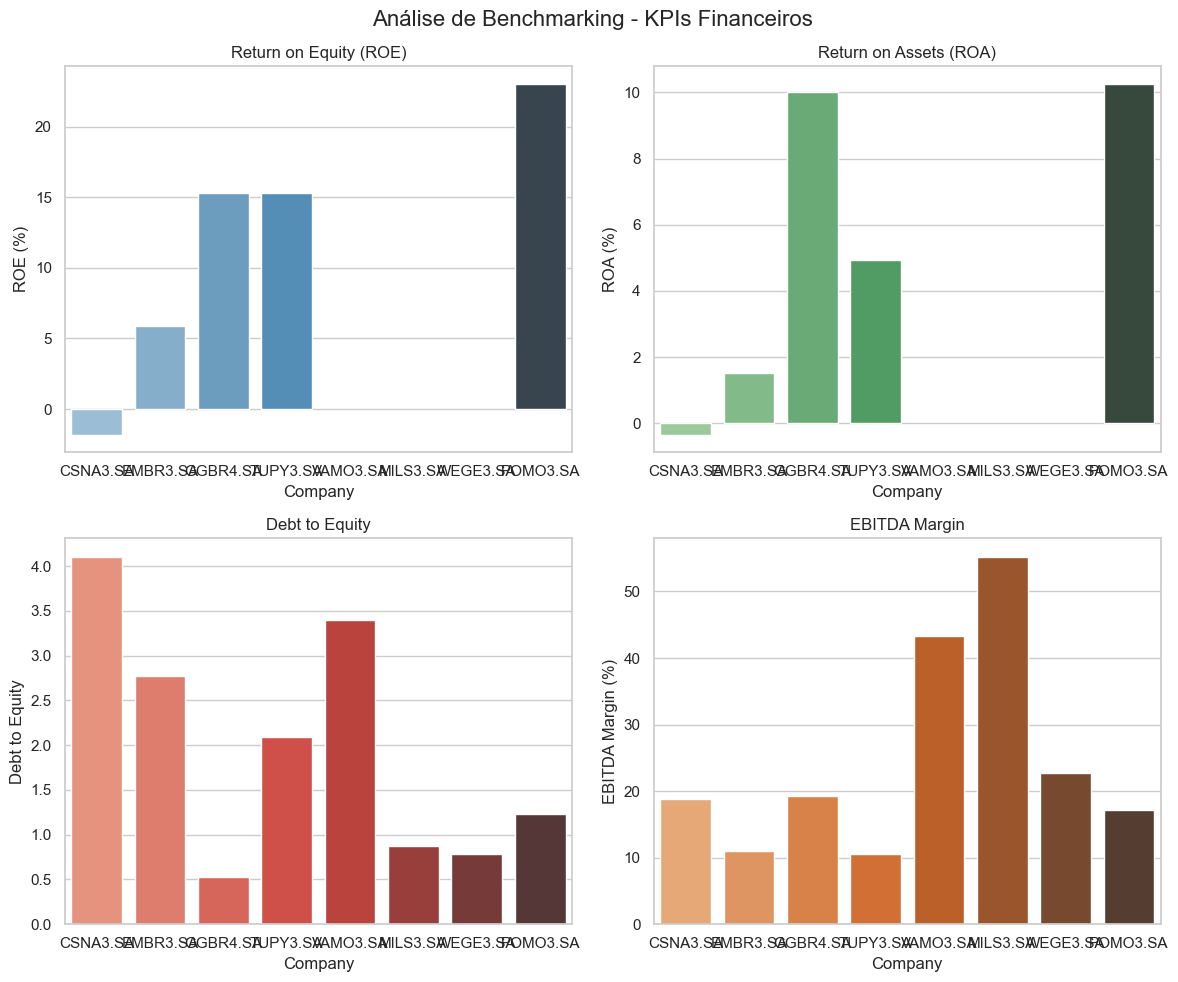

In [48]:
# Importando as bibliotecas necessárias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para obter dados financeiros da empresa
def get_financial_data(ticker):
    stock = yf.Ticker(ticker)
    balance_sheet = stock.balance_sheet
    financials = stock.financials
    cashflow = stock.cashflow
    return balance_sheet, financials, cashflow

# Função para calcular KPIs financeiros
def calculate_kpis(ticker):
    balance_sheet, financials, cashflow = get_financial_data(ticker)
    
    # Listar as possíveis variações do nome para 'Total Stockholder Equity'
    equity_variations = ['Total Stockholder Equity', 'Stockholders Equity', 'Common Stock Equity']
    
    # Identificar qual variação de 'Total Stockholder Equity' está disponível no DataFrame
    total_equity = None
    for equity_col in equity_variations:
        if equity_col in balance_sheet.index:
            total_equity = balance_sheet.loc[equity_col]
            break
    
    if total_equity is None:
        raise KeyError(f"'Total Stockholder Equity' not found in {ticker}'s balance sheet.")
    
    # Pegando dados relevantes
    total_assets = balance_sheet.loc['Total Assets']
    total_liabilities = balance_sheet.loc['Total Liabilities Net Minority Interest']
    net_income = financials.loc['Net Income']
    ebitda = financials.loc['EBITDA']
    revenue = financials.loc['Total Revenue']
    
     # Evitar zeros por dados faltantes
    if total_equity is not None and total_assets is not None and net_income is not None:
        roe = (net_income / total_equity) * 100  # Return on Equity (%)
        roa = (net_income / total_assets) * 100  # Return on Assets (%)
    else:
        roe = roa = 0
    
    if total_liabilities is not None and total_equity is not None:
        debt_to_equity = total_liabilities / total_equity  # Debt to Equity Ratio
    else:
        debt_to_equity = 0
    
    if ebitda is not None and revenue is not None:
        ebitda_margin = (ebitda / revenue) * 100  # EBITDA Margin (%)
    else:
        ebitda_margin = 0
    
    return {
        'Company': ticker,
        'ROE (%)': roe[0],
        'ROA (%)': roa[0],
        'Debt to Equity': debt_to_equity[0],
        'EBITDA Margin (%)': ebitda_margin[0]
    }

# Lista de empresas industriais no Ibovespa (Exemplo)
companies = {
    'CSN': 'CSNA3.SA',
    'Embraer': 'EMBR3.SA',
    'Gerdau': 'GGBR4.SA',
    'Tupy': 'TUPY3.SA',
    'Vamos': 'VAMO3.SA',
    'Mills': 'MILS3.SA',
    'WEGE': 'MILS3.SA',
    'Marcopolo': 'POMO3.SA'
}

# DataFrame para armazenar os KPIs das empresas
kpis_list = []  # Criar uma lista para armazenar os KPIs

# Calculando KPIs para cada empresa
for company, ticker in companies.items():
    kpis = calculate_kpis(ticker)
    kpis_list.append(kpis)  # Adicionar KPIs à lista

# Convertendo a lista de KPIs para DataFrame
kpis_df = pd.DataFrame(kpis_list)

# Visualizando os KPIs calculados
print(kpis_df)

# Plotando os KPIs em gráficos de barras
sns.set(style="whitegrid")

# Configurando gráficos para cada KPI
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Análise de Benchmarking - KPIs Financeiros', fontsize=16)

# ROE
sns.barplot(x='Company', y='ROE (%)', data=kpis_df, ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title('Return on Equity (ROE)')

# ROA
sns.barplot(x='Company', y='ROA (%)', data=kpis_df, ax=axs[0, 1], palette="Greens_d")
axs[0, 1].set_title('Return on Assets (ROA)')

# Debt to Equity
sns.barplot(x='Company', y='Debt to Equity', data=kpis_df, ax=axs[1, 0], palette="Reds_d")
axs[1, 0].set_title('Debt to Equity')

# EBITDA Margin
sns.barplot(x='Company', y='EBITDA Margin (%)', data=kpis_df, ax=axs[1, 1], palette="Oranges_d")
axs[1, 1].set_title('EBITDA Margin')

# Ajustando layout
plt.tight_layout()
plt.show()


In [80]:
import yfinance as yf
import pandas as pd

# Função para calcular o ROE
def calculate_roe(equity, net_income):
    return (net_income / equity) * 100

# Lista de tickers e nomes das empresas
companies = {
    'CSNA3.SA': 'CSN',
    'EMBR3.SA': 'Embraer',
    'GGBR4.SA': 'Gerdau',
    'TUPY3.SA': 'Tupy',
    'VAMO3.SA': 'Vamos',
    'MILS3.SA': 'Mills',
    'WEGE3.SA':'WEGE',
    'POMO3.SA': 'Marcopolo'
}


# Função para calcular ROE de um ticker específico
def get_roe(ticker, company_name):
    stock = yf.Ticker(ticker)
    
    # Obtendo dados financeiros trimestrais
    financials = stock.financials.T
    balance_sheet = stock.balance_sheet.T

    # Filtrando os dados de 'Net Income' e 'Total Equity'
    net_income = financials['Net Income']
    total_equity = balance_sheet['Stockholders Equity']

    # Ajustando o índice de datas para o formato correto
    net_income.index = pd.to_datetime(net_income.index)
    total_equity.index = pd.to_datetime(total_equity.index)

    # Resample mensal
    net_income_monthly = net_income.resample('M').mean()
    total_equity_monthly = total_equity.resample('M').mean()

    # Calculando o ROE mensal
    roe_monthly = pd.DataFrame({
        'Net Income': net_income_monthly,
        'Total Equity': total_equity_monthly
    }).dropna()

    roe_monthly['ROE (%)'] = calculate_roe(roe_monthly['Total Equity'], roe_monthly['Net Income'])
    roe_monthly['Ticker'] = ticker
    roe_monthly['Empresa'] = company_name
    roe_monthly.reset_index(inplace=True)
    roe_monthly.rename(columns={'index': 'Data'}, inplace=True)

    return roe_monthly[['Data', 'Ticker', 'Empresa', 'ROE (%)']]

# Criar um DataFrame vazio para armazenar os resultados
roe_df = pd.DataFrame()

# Calculando e armazenando o ROE para cada ticker
for ticker, company_name in companies.items():
    roe_data = get_roe(ticker, company_name)
    roe_df = pd.concat([roe_df, roe_data], ignore_index=True)

# Exibindo o DataFrame final
roe_df


C:\Users\DanaK\AppData\Local\Temp\ipykernel_17764\3002728260.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  net_income_monthly = net_income.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_17764\3002728260.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_equity_monthly = total_equity.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_17764\3002728260.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  net_income_monthly = net_income.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_17764\3002728260.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_equity_monthly = total_equity.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_17764\3002728260.py:38: FutureWarning: 'M' is deprecated and

,Data,Ticker,Empresa,ROE (%)
0,2020-12-31,CSNA3.SA,CSN,38.274209
1,2021-12-31,CSNA3.SA,CSN,60.342748
2,2022-12-31,CSNA3.SA,CSN,7.973846
3,2023-12-31,CSNA3.SA,CSN,-1.81825
4,2020-12-31,EMBR3.SA,Embraer,-26.186983
5,2021-12-31,EMBR3.SA,Embraer,-1.675475
6,2022-12-31,EMBR3.SA,Embraer,-7.221032
7,2023-12-31,EMBR3.SA,Embraer,5.885519
8,2020-12-31,GGBR4.SA,Gerdau,7.666047
9,2021-12-31,GGBR4.SA,Gerdau,36.367497


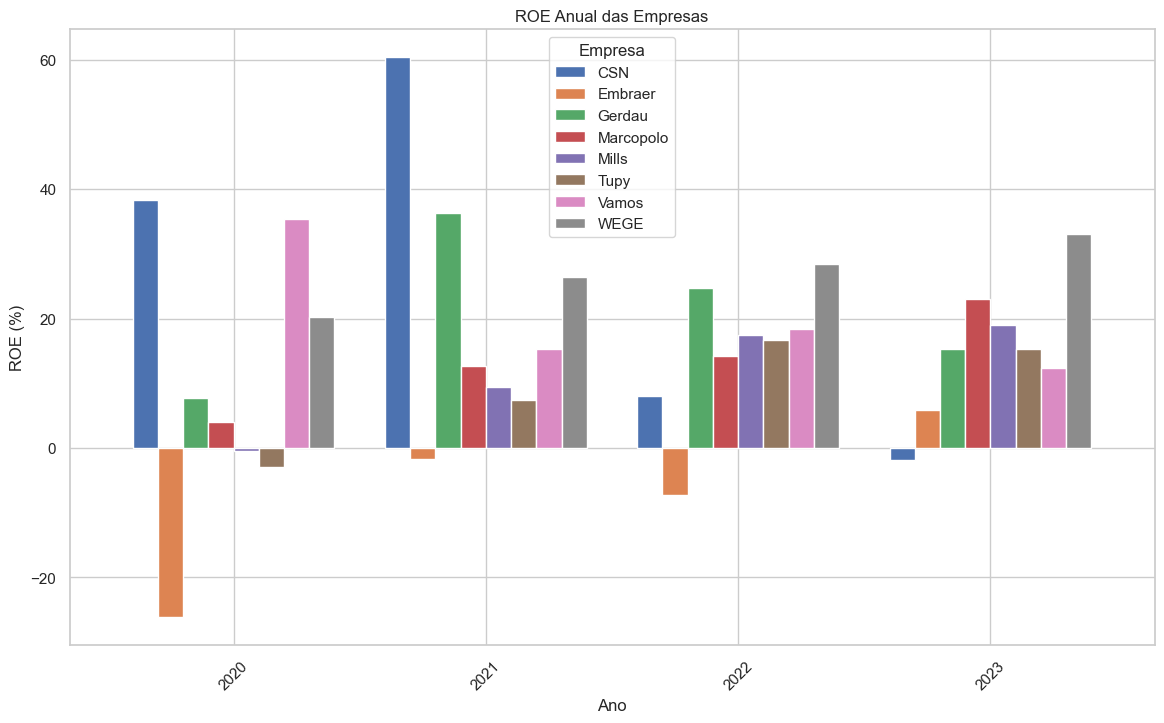

In [83]:
# Agregar os dados por ano e empresa
roe_df['Ano'] = roe_df['Data'].dt.year
roe_df = roe_df[roe_df['Ano'] >= (pd.Timestamp.now().year - 5)]  # Filtrando para os últimos 5 anos
roe_annual = roe_df.groupby(['Ano', 'Empresa'])['ROE (%)'].mean().unstack()

# Plotando o gráfico de colunas
roe_annual.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('ROE Anual das Empresas')
plt.xlabel('Ano')
plt.ylabel('ROE (%)')
plt.xticks(rotation=45)
plt.legend(title='Empresa')
plt.grid(True)
plt.show()

C:\Users\DanaK\AppData\Local\Temp\ipykernel_23512\1073468618.py:56: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  net_income_monthly = net_income.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_23512\1073468618.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_equity_monthly = total_equity.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_23512\1073468618.py:58: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_assets_monthly = total_assets.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_23512\1073468618.py:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_debt_monthly = total_debt.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_23512\1073468618.py:60: FutureWarning: 'M' is deprecated and

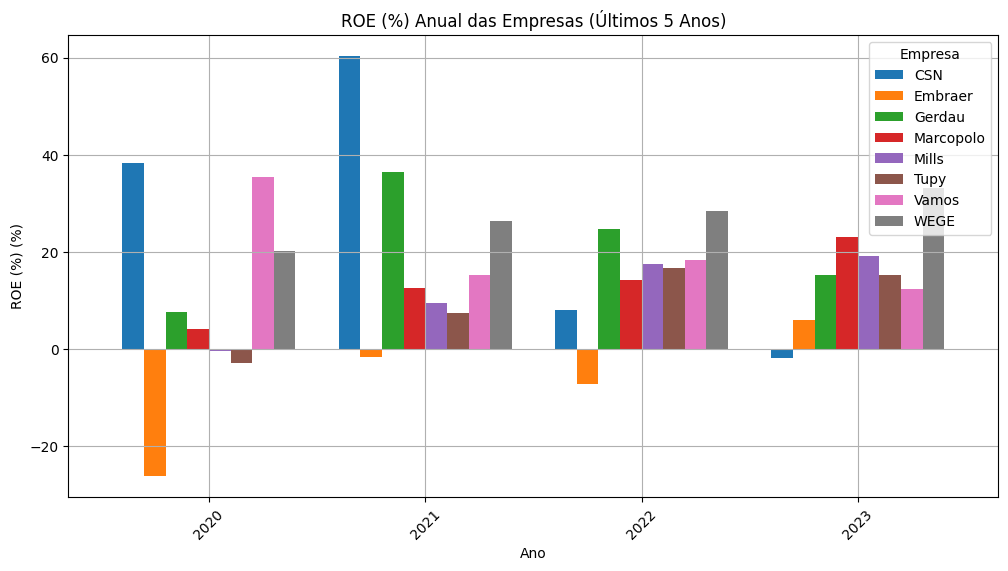

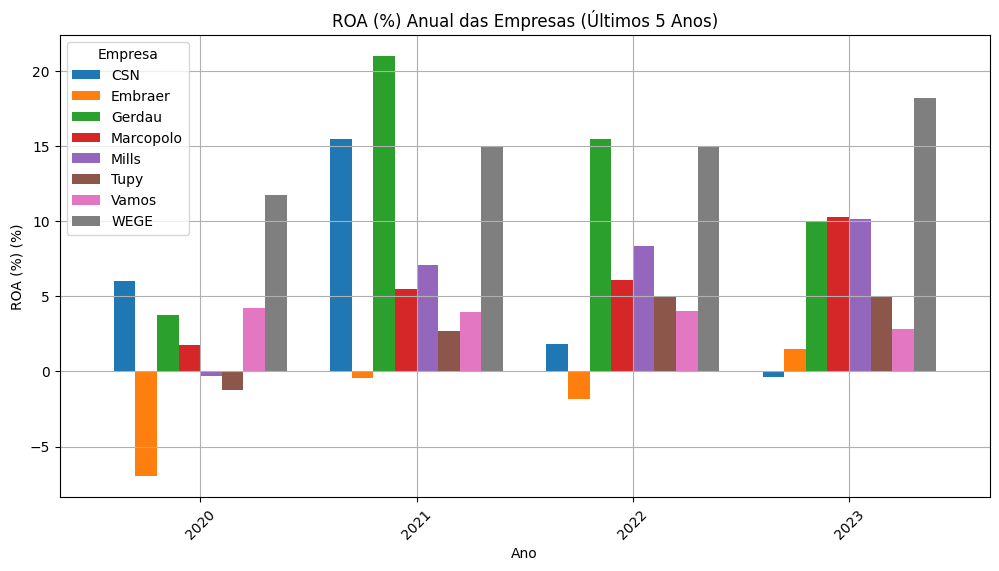

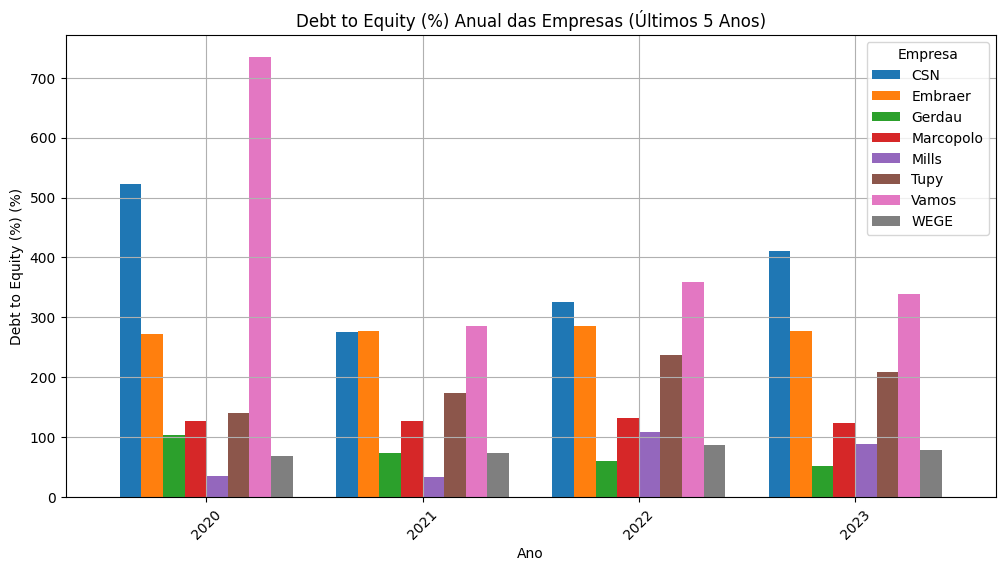

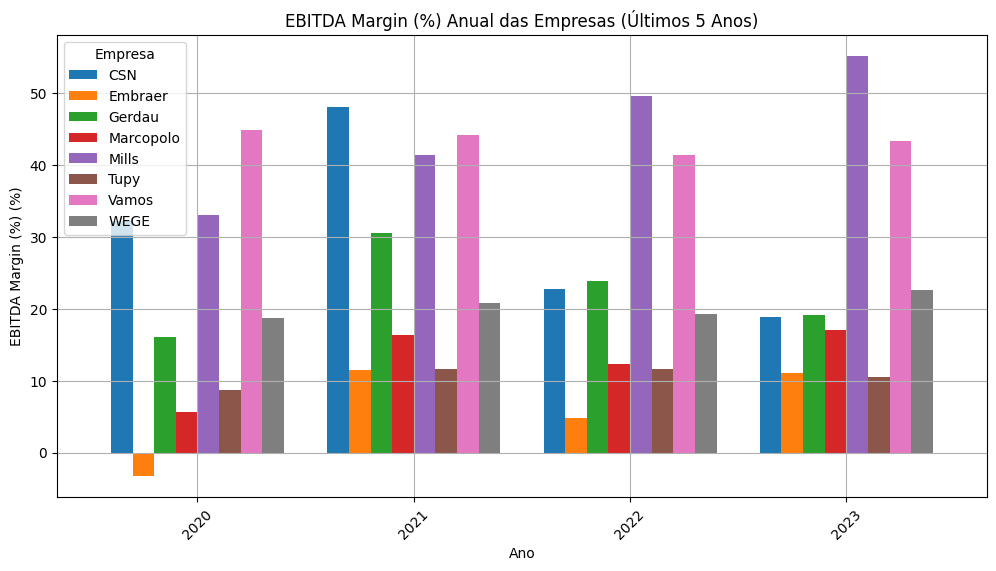

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Funções para calcular KPIs
def calculate_roe(equity, net_income):
    return (net_income / equity) * 100

def calculate_roa(total_assets, net_income):
    return (net_income / total_assets) * 100

def calculate_debt_to_equity(total_debt, total_equity):
    return (total_debt / total_equity) * 100

def calculate_ebitda_margin(ebitda, revenue):
    return (ebitda / revenue) * 100

# Lista de tickers e nomes das empresas
companies = {
    'CSNA3.SA': 'CSN',
    'EMBR3.SA': 'Embraer',
    'GGBR4.SA': 'Gerdau',
    'TUPY3.SA': 'Tupy',
    'VAMO3.SA': 'Vamos',
    'MILS3.SA': 'Mills',
    'WEGE3.SA':'WEGE',
    'POMO3.SA': 'Marcopolo'
}

# Função para calcular KPIs de um ticker específico
def get_kpis(ticker, company_name):
    stock = yf.Ticker(ticker)
    
    # Obtendo dados financeiros trimestrais
    financials = stock.financials.T
    balance_sheet = stock.balance_sheet.T
    cashflow = stock.cashflow.T
    
    # Filtrando os dados necessários
    net_income = financials['Net Income']
    total_equity = balance_sheet['Stockholders Equity']
    total_assets = balance_sheet['Total Assets']
    total_debt = balance_sheet['Total Liabilities Net Minority Interest']
    ebitda = financials.get('EBITDA', pd.Series())  # 'EBITDA' pode não estar disponível
    revenue = financials.get('Total Revenue', pd.Series())  # 'Total Revenue' pode não estar disponível
    
    # Ajustando o índice de datas para o formato correto
    net_income.index = pd.to_datetime(net_income.index)
    total_equity.index = pd.to_datetime(total_equity.index)
    total_assets.index = pd.to_datetime(total_assets.index)
    total_debt.index = pd.to_datetime(total_debt.index)
    ebitda.index = pd.to_datetime(ebitda.index)
    revenue.index = pd.to_datetime(revenue.index)

    # Resample mensal
    net_income_monthly = net_income.resample('M').mean()
    total_equity_monthly = total_equity.resample('M').mean()
    total_assets_monthly = total_assets.resample('M').mean()
    total_debt_monthly = total_debt.resample('M').mean()
    ebitda_monthly = ebitda.resample('M').mean()
    revenue_monthly = revenue.resample('M').mean()

    # Calculando KPIs mensais
    kpis_monthly = pd.DataFrame({
        'Net Income': net_income_monthly,
        'Total Equity': total_equity_monthly,
        'Total Assets': total_assets_monthly,
        'Total Debt': total_debt_monthly,
        'EBITDA': ebitda_monthly,
        'Revenue': revenue_monthly
    }).dropna()

    kpis_monthly['ROE (%)'] = calculate_roe(kpis_monthly['Total Equity'], kpis_monthly['Net Income'])
    kpis_monthly['ROA (%)'] = calculate_roa(kpis_monthly['Total Assets'], kpis_monthly['Net Income'])
    kpis_monthly['Debt to Equity (%)'] = calculate_debt_to_equity(kpis_monthly['Total Debt'], kpis_monthly['Total Equity'])
    kpis_monthly['EBITDA Margin (%)'] = calculate_ebitda_margin(kpis_monthly['EBITDA'], kpis_monthly['Revenue'])
    
    kpis_monthly['Ticker'] = ticker
    kpis_monthly['Empresa'] = company_name
    kpis_monthly.reset_index(inplace=True)
    kpis_monthly.rename(columns={'index': 'Data'}, inplace=True)

    return kpis_monthly[['Data', 'Ticker', 'Empresa', 'ROE (%)', 'ROA (%)', 'Debt to Equity (%)', 'EBITDA Margin (%)']]

# Criar um DataFrame vazio para armazenar os resultados
kpis_df = pd.DataFrame()

# Calculando e armazenando KPIs para cada ticker
for ticker, company_name in companies.items():
    kpis_data = get_kpis(ticker, company_name)
    kpis_df = pd.concat([kpis_df, kpis_data], ignore_index=True)

# Função para plotar gráficos de KPIs
def plot_kpis(kpis_df, kpi_name):
    kpis_df['Ano'] = kpis_df['Data'].dt.year
    kpis_df = kpis_df[kpis_df['Ano'] >= (pd.Timestamp.now().year - 5)]  # Filtrando para os últimos 5 anos
    kpi_annual = kpis_df.groupby(['Ano', 'Empresa'])[kpi_name].mean().unstack()

    kpi_annual.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title(f'{kpi_name} Anual das Empresas (Últimos 5 Anos)')
    plt.xlabel('Ano')
    plt.ylabel(f'{kpi_name} (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Empresa')
    plt.grid(True)
    plt.show()

# Plotando gráficos para cada KPI
plot_kpis(kpis_df, 'ROE (%)')
plot_kpis(kpis_df, 'ROA (%)')
plot_kpis(kpis_df, 'Debt to Equity (%)')
plot_kpis(kpis_df, 'EBITDA Margin (%)')


In [ ]:
yf.Ticker(ticker)
    
    # Obtendo dados financeiros trimestrais
    financials = stock.financials.T
    balance_sheet = stock.balance_sheet.T
    cashflow = stock.cashflow.T
    
    # Filtrando os dados necessários
    net_income = financials['Net Income']

In [78]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Funções para calcular KPIs
# ROE (%)
def calculate_roe(equity, net_income):
    return (net_income / equity) * 100
#ROA (%)
def calculate_roa(total_assets, net_income):
    return (net_income / total_assets) * 100

def calculate_debt_to_equity(total_debt, total_equity):
    return (total_debt / total_equity) * 100

def calculate_ebitda_margin(ebitda, revenue):
    return (ebitda / revenue) * 100

def calculate_net_margin(net_income, revenue):
    return (net_income / revenue) * 100

def calculate_current_ratio(current_assets, current_liabilities):
    return (current_assets / current_liabilities) * 100

def calculate_debt_to_ebitda(total_debt, ebitda):
    return (total_debt / ebitda) * 100

def calculate_debt_to_equity_ratio(total_debt, equity):
    return (total_debt / equity) * 100

# Lista de tickers e nomes das empresas
companies = {
    'CSNA3.SA': 'CSN',
    'EMBR3.SA': 'Embraer',
    'GGBR4.SA': 'Gerdau',
    'TUPY3.SA': 'Tupy',
    'VAMO3.SA': 'Vamos',
    'MILS3.SA': 'Mills',
    'WEGE3.SA':'WEGE',
    'POMO3.SA': 'Marcopolo'
}

# Função para calcular KPIs de um ticker específico
def get_kpis(ticker, company_name):
    stock = yf.Ticker(ticker)
    
    # Obtendo dados financeiros trimestrais
    financials = stock.financials.T
    balance_sheet = stock.balance_sheet.T
    cashflow = stock.cashflow.T
    
    # Filtrando os dados necessários
    net_income = financials['Net Income']
    total_equity = balance_sheet['Stockholders Equity']
    total_assets = balance_sheet['Total Assets']
    total_debt = balance_sheet['Total Liabilities Net Minority Interest']
    ebitda = financials.get('EBITDA', pd.Series())  # 'EBITDA' pode não estar disponível
    revenue = financials.get('Total Revenue', pd.Series())  # 'Total Revenue' pode não estar disponível


    current_assets = balance_sheet.get('Current Assets', pd.Series())  # 'Total Current Assets' pode não estar disponível
    current_liabilities = balance_sheet.get('Current Liabilities', pd.Series())  # 'Total Current Liabilities' pode não estar disponível
  
    
    # Ajustando o índice de datas para o formato correto
    net_income.index = pd.to_datetime(net_income.index)
    total_equity.index = pd.to_datetime(total_equity.index)
    total_assets.index = pd.to_datetime(total_assets.index)
    total_debt.index = pd.to_datetime(total_debt.index)
    ebitda.index = pd.to_datetime(ebitda.index)
    revenue.index = pd.to_datetime(revenue.index)

    current_assets.index = pd.to_datetime(current_assets.index)
    current_liabilities.index = pd.to_datetime(current_liabilities.index)    

    # Resample mensal
    net_income_monthly = net_income.resample('M').mean()
    total_equity_monthly = total_equity.resample('M').mean()
    total_assets_monthly = total_assets.resample('M').mean()
    total_debt_monthly = total_debt.resample('M').mean()
    ebitda_monthly = ebitda.resample('M').mean()
    revenue_monthly = revenue.resample('M').mean()

    current_assets_monthly = current_assets.resample('M').mean()
    current_liabilities_monthly = current_liabilities.resample('M').mean()    

    # Calculando KPIs mensais
    kpis_monthly = pd.DataFrame({
        'Net Income': net_income_monthly,
        'Total Equity': total_equity_monthly,
        'Total Assets': total_assets_monthly,
        'Total Debt': total_debt_monthly,
        'EBITDA': ebitda_monthly,
        'Revenue': revenue_monthly,
        'Current Assets': current_assets_monthly,
        'Current Liabilities': current_liabilities_monthly       
    }).dropna()

    kpis_monthly['ROE (%)'] = calculate_roe(kpis_monthly['Total Equity'], kpis_monthly['Net Income'])
    kpis_monthly['ROA (%)'] = calculate_roa(kpis_monthly['Total Assets'], kpis_monthly['Net Income'])
    kpis_monthly['Debt to Equity (%)'] = calculate_debt_to_equity(kpis_monthly['Total Debt'], kpis_monthly['Total Equity'])
    kpis_monthly['EBITDA Margin (%)'] = calculate_ebitda_margin(kpis_monthly['EBITDA'], kpis_monthly['Revenue'])
    kpis_monthly['Net Margin (%)'] = calculate_net_margin(kpis_monthly['Net Income'], kpis_monthly['Revenue'])
    kpis_monthly['Debt to EBITDA'] = calculate_debt_to_ebitda(kpis_monthly['Total Debt'], kpis_monthly['EBITDA'])
    kpis_monthly['Debt to Equity Ratio'] = calculate_debt_to_equity_ratio(kpis_monthly['Total Debt'], kpis_monthly['Total Equity'])
    kpis_monthly['Current Ratio'] = calculate_current_ratio(kpis_monthly['Current Assets'], kpis_monthly['Current Liabilities'])

    
    kpis_monthly['Ticker'] = ticker
    kpis_monthly['Empresa'] = company_name
    kpis_monthly.reset_index(inplace=True)
    kpis_monthly.rename(columns={'index': 'Data'}, inplace=True)

    return kpis_monthly[['Data', 'Ticker', 'Empresa', 'ROE (%)', 'ROA (%)', 'Debt to Equity (%)', 'EBITDA Margin (%)', 
                         'Current Ratio', 
                         'Net Margin (%)', 'Debt to EBITDA', 'Debt to Equity Ratio']]

# Criar um DataFrame vazio para armazenar os resultados
kpis_df = pd.DataFrame()

# Calculando e armazenando KPIs para cada ticker
for ticker, company_name in companies.items():
    kpis_data = get_kpis(ticker, company_name)
    kpis_df = pd.concat([kpis_df, kpis_data], ignore_index=True)

# Filtrar para o ano de 2023 e Net Margin (%) abaixo de 10%

# CSN, Embraer e Tupy
kpis_df_1 = kpis_df[(kpis_df['Data'].dt.year == 2023) & (kpis_df['Net Margin (%)'] < 9)] 
 # n/a
kpis_df_2 = kpis_df[(kpis_df['Data'].dt.year == 2023) & (kpis_df['Current Ratio'] < 1)] 
# todas
kpis_df_3 = kpis_df[(kpis_df['Data'].dt.year == 2023) & (kpis_df['Debt to EBITDA'] > 3)]
# todas
kpis_df_4 = kpis_df[(kpis_df['Data'].dt.year == 2023) & (kpis_df['Debt to Equity Ratio'] > 1)]
# CSN, Embraer
kpis_df_5 = kpis_df[(kpis_df['Data'].dt.year == 2023) & (kpis_df['ROE (%)'] < 10)]

# Filtrando empresas com Net Margin (%) maior ou igual a 10%
kpis_df_filtered = kpis_df[kpis_df['Net Margin (%)'] >= 10]

kpis_df[(kpis_df['Data'].dt.year == 2023)]

C:\Users\DanaK\AppData\Local\Temp\ipykernel_16492\1233461289.py:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  net_income_monthly = net_income.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_16492\1233461289.py:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_equity_monthly = total_equity.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_16492\1233461289.py:79: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_assets_monthly = total_assets.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_16492\1233461289.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_debt_monthly = total_debt.resample('M').mean()
C:\Users\DanaK\AppData\Local\Temp\ipykernel_16492\1233461289.py:81: FutureWarning: 'M' is deprecated and

,Data,Ticker,Empresa,ROE (%),ROA (%),Debt to Equity (%),EBITDA Margin (%),Current Ratio,Net Margin (%),Debt to EBITDA,Debt to Equity Ratio
3,2023-12-31,CSNA3.SA,CSN,-1.81825,-0.347653,410.526348,18.892428,132.220345,-0.700309,836.930375,410.526348
7,2023-12-31,EMBR3.SA,Embraer,5.885519,1.520983,277.882648,11.073361,165.19533,3.11284,1327.254028,277.882648
11,2023-12-31,GGBR4.SA,Gerdau,15.290918,10.017427,52.276448,19.202798,258.741169,10.885014,193.792519,52.276448
15,2023-12-31,TUPY3.SA,Tupy,15.28584,4.940716,209.277182,10.576917,190.546755,4.469841,578.582822,209.277182
19,2023-12-31,VAMO3.SA,Vamos,12.395405,2.820721,339.440964,43.342006,174.589985,9.645234,609.406802,339.440964
23,2023-12-31,MILS3.SA,Mills,19.047182,10.141932,87.638075,55.209486,262.211525,20.172658,168.116958,87.638075
27,2023-12-31,WEGE3.SA,WEGE,33.05064,18.197933,78.661211,22.67103,192.182787,17.633954,185.122503,78.661211
31,2023-12-31,POMO3.SA,Marcopolo,23.018516,10.254152,123.29412,17.117457,201.528909,12.212066,382.133345,123.29412


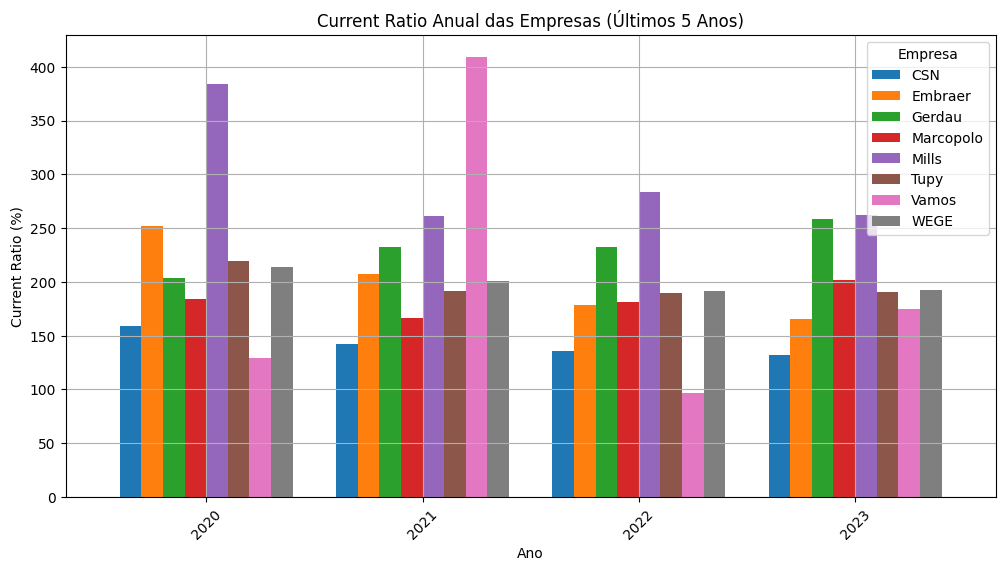

In [77]:
# Função para plotar gráficos de KPIs
def plot_kpis(kpis_df, kpi_name):
    kpis_df['Ano'] = kpis_df['Data'].dt.year
    kpis_df = kpis_df[kpis_df['Ano'] >= (pd.Timestamp.now().year - 5)]  # Filtrando para os últimos 5 anos
    kpi_annual = kpis_df.groupby(['Ano', 'Empresa'])[kpi_name].mean().unstack()

    kpi_annual.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title(f'{kpi_name} Anual das Empresas (Últimos 5 Anos)')
    plt.xlabel('Ano')
    plt.ylabel(f'{kpi_name} (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Empresa')
    plt.grid(True)
    plt.show()

# Plotando gráficos para cada KPI
plot_kpis(kpis_df, 'Current Ratio')
